<a href="https://colab.research.google.com/github/alluthanu/2021_FWD_LAB.21b01a1207/blob/main/emotiondetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/eINTERFACE_2021_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1260_jpg.rf.1d611c147116f4a09000102b81aa2578.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1260_jpg.rf.3026055df813cf9322f105158f933489.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1265_jpg.rf.72458f8d1c9bb6e20b8157d1dfc45216.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1265_jpg.rf.bb4efffabee09a240e58e02be431d49a.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1270_jpg.rf.20f20ac4d8e9853f29a13b2da55bbef5.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1270_jpg.rf.cb72ccdd14d57f24861afa742dc041e4.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1275_jpg.rf.4cbd3d3fef9d42f68f05579b60fd11d5.jpg  
  inflating: eINTERFACE_2021_Image/train/Sadness/myvideo_frames1275_jpg.rf.e7c115fac55528bc1ef092db356b16e9.jpg  
  inflating: eINTERFACE_2021_Image/tr

In [ ]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
TRAIN_DIR='/content/eINTERFACE_2021_Image/train'
TEST_DIR='/content/eINTERFACE_2021_Image/test'
BATCH_SIZE=64

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1896 in folder Anger
For training data, found 1922 in folder Surprise


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 237 in folder Anger
For testing data, found 241 in folder Surprise


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [ ]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


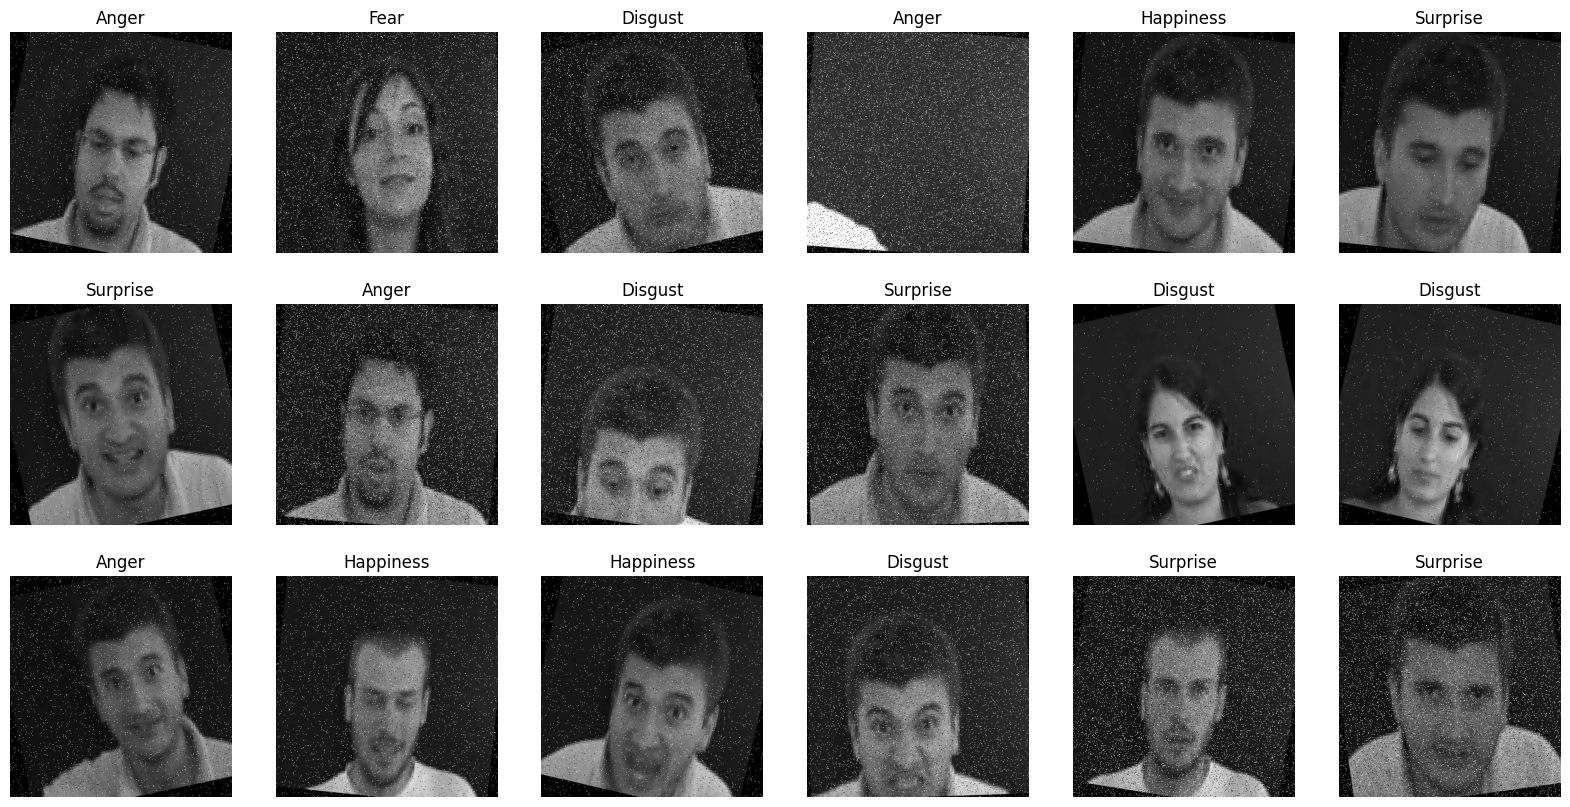

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6,i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/eINTERFACE_2021_Image/train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


In [ ]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
180/180 [==============================] - 257s 1s/step - loss: 1.7684 - accuracy: 0.2456 - val_loss: 1.6248 - val_accuracy: 0.3561
Epoch 2/50
180/180 [==============================] - 254s 1s/step - loss: 1.5168 - accuracy: 0.3820 - val_loss: 1.4567 - val_accuracy: 0.4235
Epoch 3/50
180/180 [==============================] - 249s 1s/step - loss: 1.3496 - accuracy: 0.4556 - val_loss: 1.2378 - val_accuracy: 0.4889
Epoch 4/50
180/180 [==============================] - 252s 1s/step - loss: 1.2040 - accuracy: 0.5184 - val_loss: 1.1172 - val_accuracy: 0.5480
Epoch 5/50
180/180 [==============================] - 253s 1s/step - loss: 1.1054 - accuracy: 0.5594 - val_loss: 1.1784 - val_accuracy: 0.5396
Epoch 6/50
180/180 [==============================] - 263s 1s/step - loss: 1.0041 - accuracy: 0.6072 - val_loss: 1.0380 - val_accuracy: 0.5904
Epoch 7/50
180/180 [==============================] - 248s 1s/step - loss: 0.9294 - accuracy: 0.6454 - val_loss: 0.9442 - val_accuracy: 0.6273

In [19]:
classifier.evaluate(test_set)

23/23 [==============================] - 8s 361ms/step - loss: 0.4268 - accuracy: 0.8519


[0.42679616808891296, 0.8518776297569275]

Text(0, 0.5, 'Loss')

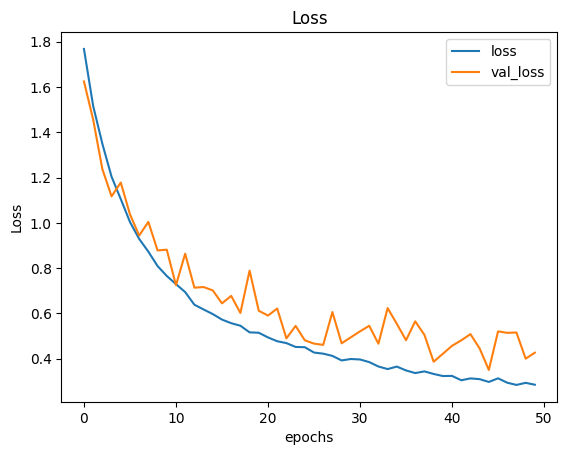

In [21]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')


Text(0, 0.5, 'Accuracy')

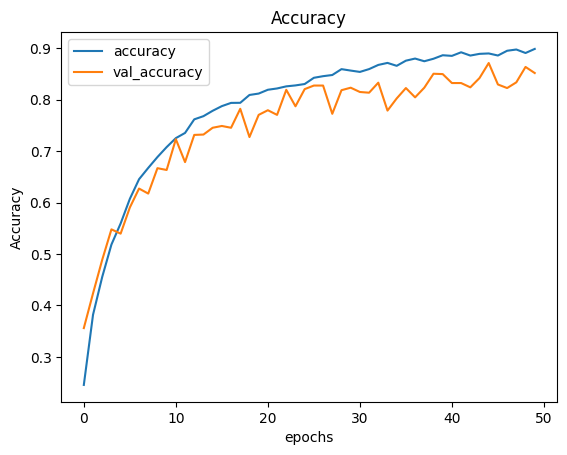

In [23]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [31]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/eINTERFACE_2021_Image/test/Anger/myvideo_frames1115_jpg.rf.6fc5fc52000b8ba32368212d3c13d56d.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 79ms/step


0